<a href="https://colab.research.google.com/github/Kiarashmo/AI-Course/blob/main/Adult_Income_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Mining Project 2 - Group 7
### Saya Hashemian (9822090) - Reyhaneh Tarighati Tabesh (9813022) - Kiarash Mokhtari Dizaji (9830032)

## Table of Contents
* [1. Importing necessary packages](#chapter1)
* [2. Loading The Train Dataset & EDA](#chapter2)
    * [2.1. Initial Analysis of Dataset](#section_2_1)
    * [2.2. About the Dataset](#section_2_2)
    * [2.3. Replacing Missing Values](#section_2_3)
    * [2.4. Exploratory Data Analysis (EDA)](#section_2_4)
* [3. Preprocessing of Train Dataset](#chapter3)
* [4. Preprocessing of Test Dataset](#chapter4)
* [5. Implementation of Classification Models using Label encoding](#chapter5)
    * [5.1. Decision Tree Model](#section_5_1)
    * [5.2. SVM Model](#section_5_2)
    * [5.3. KNN Model](#section_5_3)
* [6. Implementation of Classification Models using OneHot encoding](#chapter6)
    * [6.1. Train & Test OneHot Encoding](#section_6_1)
    * [6.2. Decision Tree Model](#section_6_2)
    * [6.3. SVM Model](#section_6_3)
    * [6.4. KNN Model](#section_6_4)

## 1. Importing necessary packages <a class="anchor" id="chapter1"></a>

In [ ]:
from google.colab import drive
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

## 2. Loading The Train Dataset & EDA <a class="anchor" id="chapter2"></a>

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('drive/My Drive/Data mining/Adult_TrainDataset.csv')

### 2.1. Initial Analysis of Dataset <a class="anchor" id="section_2_1"></a>

In [ ]:
df.head()

,Age,Work_Class,Final_Weight,Education,Education-Number,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours-Per-Week,Native_Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
shape_row, shape_col = df.shape
print("Number of Row:", shape_row)
print("Number of Column:", shape_col)

Number of Row: 32561
Number of Column: 15


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               32561 non-null  int64 
 1   Work_Class        32561 non-null  object
 2   Final_Weight      32561 non-null  int64 
 3   Education         32561 non-null  object
 4   Education-Number  32561 non-null  int64 
 5   Marital_Status    32561 non-null  object
 6   Occupation        32561 non-null  object
 7   Relationship      32561 non-null  object
 8   Race              32561 non-null  object
 9   Sex               32561 non-null  object
 10  Capital_Gain      32561 non-null  int64 
 11  Capital_Loss      32561 non-null  int64 
 12  Hours-Per-Week    32561 non-null  int64 
 13  Native_Country    32561 non-null  object
 14  Income            32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### 2.2. About the Dataset <a class="anchor" id="section_2_2"></a>

1. **Age**: Describes the age of individuals. Continuous.   

2. **Work_Class**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. fnlwgt: Continuous.

3. **Final_Weight**: Continuous.

4. **Education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

5. **Education-Number**: Number of years spent in education. Continuous.

6. **Marital_Status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

7. **Occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

8. **Relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

9. **Race**: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

10. **Sex**: Female, Male.

11. **Capital_Gain**: Continuous.

12. **Capital_Loss**: Continuous.

13. **Hours_Per_Week**: Continuous.

14. **Native_Country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

15. **Income**: '>50K','<=50K'

In [ ]:
df.describe()

,Age,Final_Weight,Education-Number,Capital_Gain,Capital_Loss,Hours-Per-Week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


### 2.3. Replacing Missing Values <a class="anchor" id="section_2_3"></a>

In [ ]:
df.replace('?',float('nan'),inplace=True)

In [ ]:
missing_counts = df.isna().sum()
missing_counts

Age                    0
Work_Class          1836
Final_Weight           0
Education              0
Education-Number       0
Marital_Status         0
Occupation          1843
Relationship           0
Race                   0
Sex                    0
Capital_Gain           0
Capital_Loss           0
Hours-Per-Week         0
Native_Country       583
Income                 0
dtype: int64

In [ ]:
missing_features = ['Work_Class', 'Occupation', 'Native_Country']
for feature in missing_features:
     df[feature].fillna(df[feature].mode()[0], inplace=True)

missing_counts = df.isna().sum()
missing_counts

Age                 0
Work_Class          0
Final_Weight        0
Education           0
Education-Number    0
Marital_Status      0
Occupation          0
Relationship        0
Race                0
Sex                 0
Capital_Gain        0
Capital_Loss        0
Hours-Per-Week      0
Native_Country      0
Income              0
dtype: int64

### 2.4. Exploratory Data Analysis (EDA) <a class="anchor" id="section_2_4"></a>

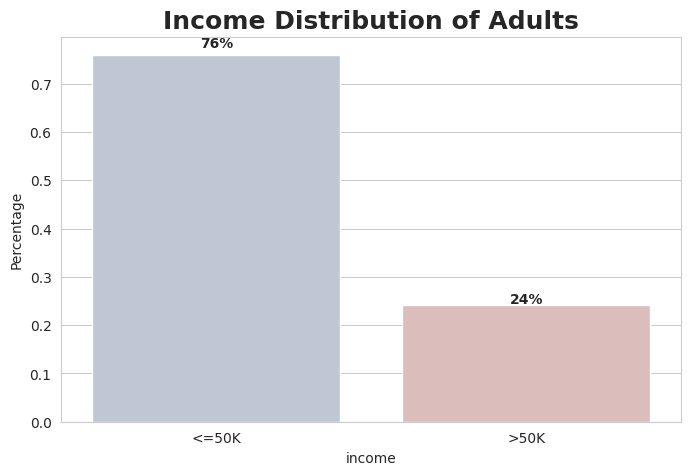

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize = (8,5))
plt.title('Income Distribution of Adults', fontsize=18, fontweight='bold')
eda_percentage = df['Income'].value_counts(normalize = True).rename_axis('income').reset_index(name = 'Percentage')

ax = sns.barplot(x = 'income', y = 'Percentage', data = eda_percentage.head(10), palette='vlag')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

In [ ]:
def age_group(x):
    x = abs(int(x))

    if( 18 < x < 31 ):
        return "19-30"
    if( 30 < x < 41 ):
        return "31-40"
    if( 40 < x < 51 ):
        return "41-50"
    if( 50 < x < 61 ):
        return "51-60"
    if( 60 < x < 71 ):
        return "61-70"
    if( 70 < x < 81 ):
        return "71-80"
    else:
        return "81-90"


df['age_group'] = df['Age'].apply(age_group)
print(df['age_group'].head(20))

0     31-40
1     41-50
2     31-40
3     51-60
4     19-30
5     31-40
6     41-50
7     51-60
8     31-40
9     41-50
10    31-40
11    19-30
12    19-30
13    31-40
14    31-40
15    31-40
16    19-30
17    31-40
18    31-40
19    41-50
Name: age_group, dtype: object


In [ ]:
replaceDict = {'19-30': 25,
               '31-40': 35,
               '41-50': 45,
               '51-60': 55,
               '61-70': 65,
               '71-80': 75,
               '81-90': 85}

df['age_group'] = df['age_group'].apply(lambda x: replaceDict.get(x, x))
print(df['age_group'].head())

0    35
1    45
2    35
3    55
4    25
Name: age_group, dtype: int64


Text(0.5, 1.0, 'Income/Age Groups Plot')

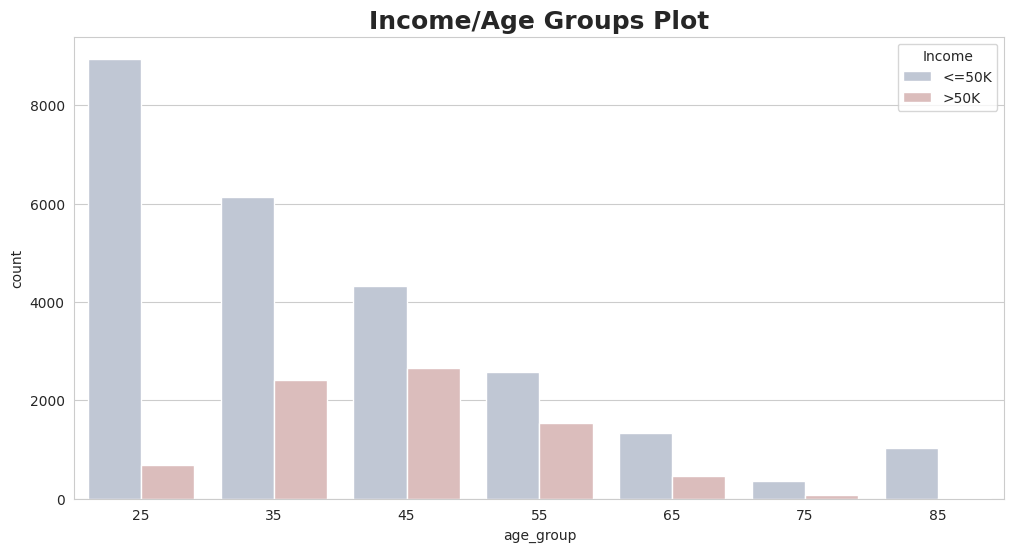

In [ ]:
plt.figure(figsize=(12,6))
order_list = [25,35,45,55,65,75,85]
sns.countplot(data=df, x='age_group', hue = df['Income'], palette='vlag', order = order_list)
plt.title('Income/Age Groups Plot', fontsize=18, fontweight='bold')

Text(0.5, 1.0, 'Income\\Working Classes Plot')

<Figure size 1200x600 with 0 Axes>

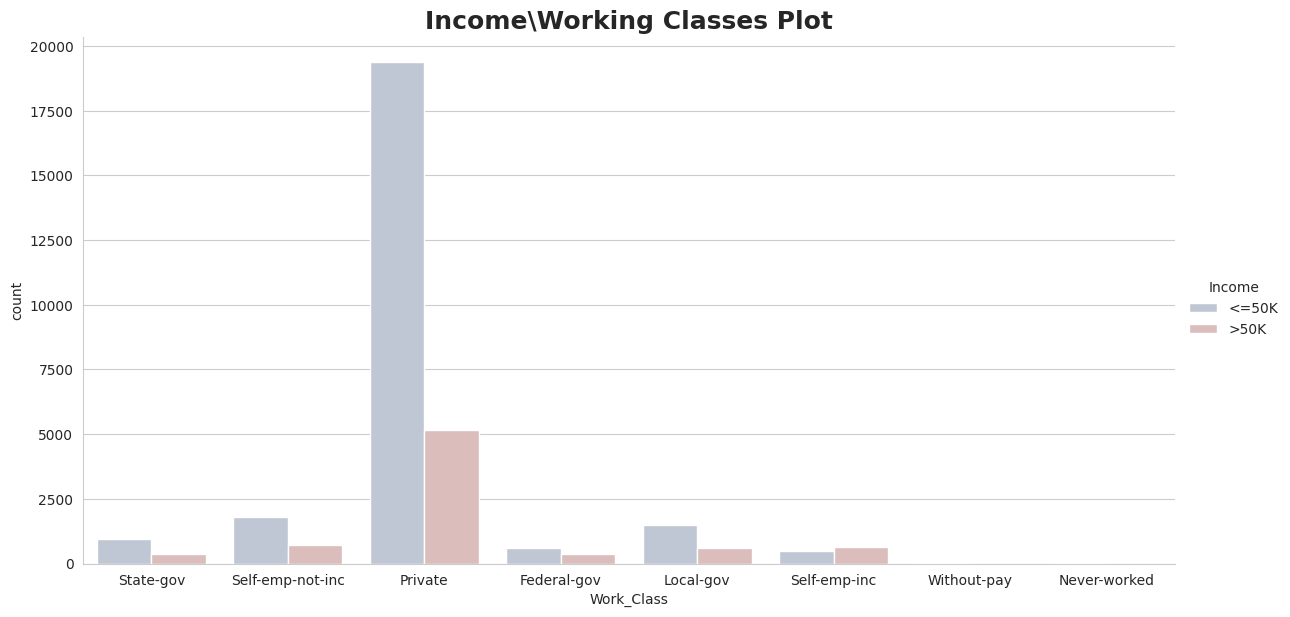

In [ ]:
plt.figure(figsize=(12,6))
sns.catplot(data=df, x='Work_Class', hue='Income', kind='count', palette='vlag', height=6, aspect=2)
plt.title('Income\Working Classes Plot', fontsize=18, fontweight='bold')

Text(0.5, 1.0, 'Income\\Genders Plot')

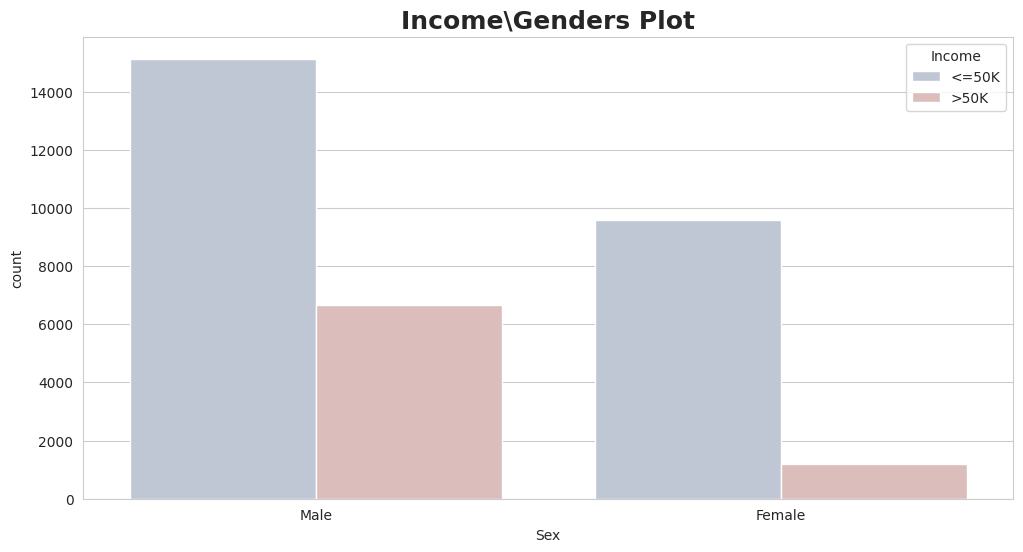

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Sex', hue='Income', palette='vlag')
plt.title('Income\Genders Plot', fontsize=18, fontweight='bold')

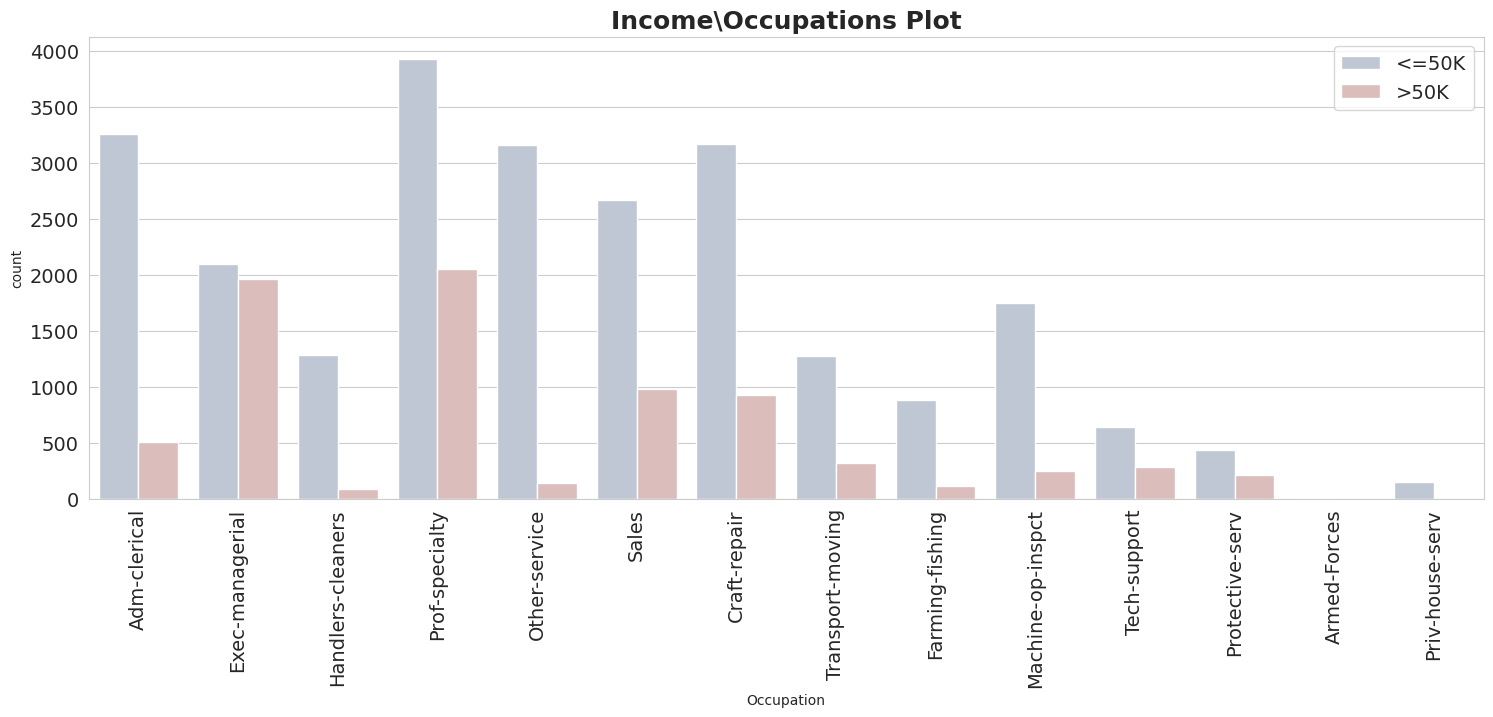

In [ ]:
plt.figure(figsize=(18,6))
sns.countplot(data=df, x='Occupation', hue='Income', palette='vlag')
plt.title('Income\Occupations Plot', fontsize=18, fontweight='bold')
plt.xticks(fontsize=14,rotation = 90)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)

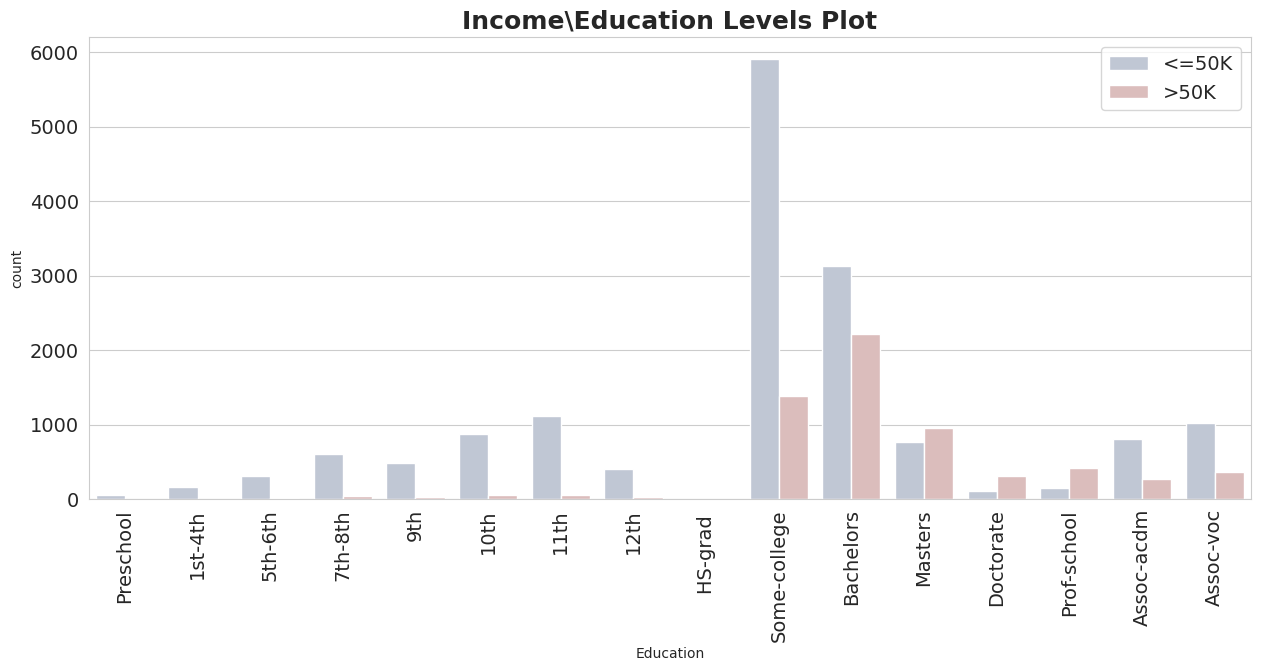

In [ ]:
plt.figure(figsize=(15,6))
order_list = ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 'HS-grad ', 'Some-college',
              'Bachelors', 'Masters', 'Doctorate', 'Prof-school', 'Assoc-acdm', 'Assoc-voc']

sns.countplot(data=df, x='Education', hue='Income', palette='vlag', order= order_list)
plt.title('Income\Education Levels Plot', fontsize=18, fontweight='bold')
plt.xticks(fontsize=14,rotation = 90)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)

## 3. Preprocessing of Train Dataset<a class="anchor" id="chapter3"></a>

In [ ]:
df.drop(['Education-Number'], axis = 1, inplace = True)

In [ ]:
df['Education'].replace(['11th', '9th', '7th-8th', '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], 'School', inplace = True)

In [ ]:
df['Race'].replace(['Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other'],'Other', inplace = True)

In [ ]:
df.head()

,Age,Work_Class,Final_Weight,Education,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours-Per-Week,Native_Country,Income,age_group
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,35
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,45
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,35
3,53,Private,234721,School,Married-civ-spouse,Handlers-cleaners,Husband,Other,Male,0,0,40,United-States,<=50K,55
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Other,Female,0,0,40,Cuba,<=50K,25


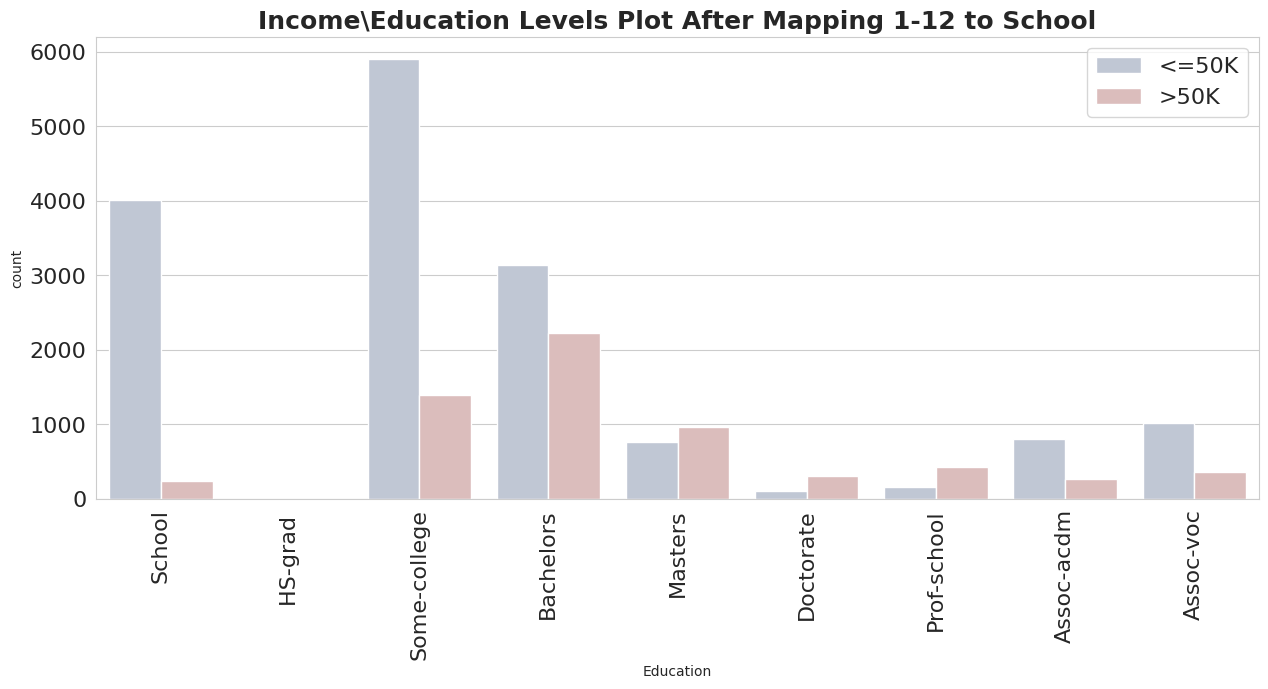

In [ ]:
plt.figure(figsize=(15,6))
order_list = ['School', 'HS-grad ', 'Some-college', 'Bachelors', 'Masters', 'Doctorate', 'Prof-school', 'Assoc-acdm', 'Assoc-voc']

sns.countplot(data=df, x='Education', hue='Income', palette='vlag', order= order_list)
plt.title('Income\Education Levels Plot After Mapping 1-12 to School', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

In [ ]:
df['Age'] = df['age_group']
df.drop('age_group', inplace = True, axis = 1)

In [ ]:
df['Income'] = df['Income'].replace({'<=50K': 0, '>50K': 1})

In [ ]:
df.head()

,Age,Work_Class,Final_Weight,Education,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours-Per-Week,Native_Country,Income
0,35,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,45,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,35,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,55,Private,234721,School,Married-civ-spouse,Handlers-cleaners,Husband,Other,Male,0,0,40,United-States,0
4,25,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Other,Female,0,0,40,Cuba,0


In [ ]:
for feature in df.columns:
    counts = df[feature].value_counts()
    print(f"Value Counts for feature '{feature}':")
    print(counts)
    print()

Value Counts for feature 'Age':
25    9627
35    8546
45    6983
55    4128
65    1792
85    1044
75     441
Name: Age, dtype: int64

Value Counts for feature 'Work_Class':
Private             24532
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: Work_Class, dtype: int64

Value Counts for feature 'Final_Weight':
164190    13
203488    13
123011    13
148995    12
121124    12
          ..
232784     1
325573     1
140176     1
318264     1
257302     1
Name: Final_Weight, Length: 21648, dtype: int64

Value Counts for feature 'Education':
HS-grad         10501
Some-college     7291
Bachelors        5355
School           4253
Masters          1723
Assoc-voc        1382
Assoc-acdm       1067
Prof-school       576
Doctorate         413
Name: Education, dtype: int64

Value Counts for feature 'Marital_Status':
Married-civ-spouse       14976
Never-married

### Train Label Encoding

In [ ]:
cat_feature = ['Work_Class','Education', 'Marital_Status', 'Occupation', 'Relationship', 'Race', 'Sex','Native_Country']

encoder = LabelEncoder()
for col in cat_feature:
    encoder.fit(df[col])
    df[col] = encoder.transform(df[col])

In [ ]:
df.head()

,Age,Work_Class,Final_Weight,Education,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours-Per-Week,Native_Country,Income
0,35,6,77516,2,4,0,1,1,1,2174,0,40,38,0
1,45,5,83311,2,2,3,0,1,1,0,0,13,38,0
2,35,3,215646,4,0,5,1,1,1,0,0,40,38,0
3,55,3,234721,7,2,5,0,0,1,0,0,40,38,0
4,25,3,338409,2,2,9,5,0,0,0,0,40,4,0


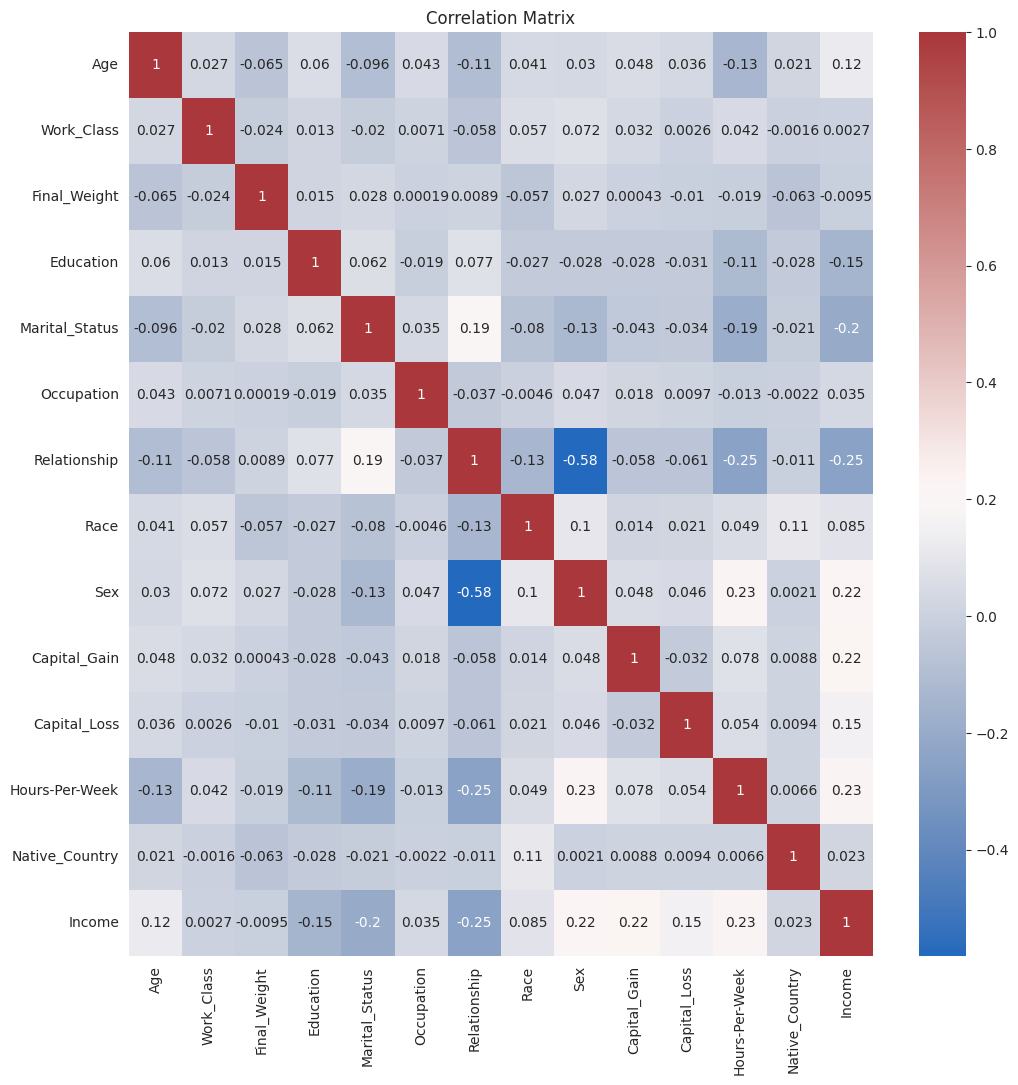

In [ ]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='vlag')
plt.title('Correlation Matrix')
plt.show()

## 4. Preprocessing of Test Dataset<a class="anchor" id="chapter4"></a>

In [ ]:
df_test = pd.read_csv('drive/My Drive/Data mining/Adult_TestDataset.csv')

In [ ]:
df_test.head()

,Age,Work_Class,Final_Weight,Education,Education-Number,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours-Per-Week,Native_Country,Income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
test_shape_row, test_shape_col = df_test.shape
print("Number of Row:", test_shape_row)
print("Number of Column:", test_shape_col)

Number of Row: 16281
Number of Column: 15


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               16281 non-null  int64 
 1   Work_Class        16281 non-null  object
 2   Final_Weight      16281 non-null  int64 
 3   Education         16281 non-null  object
 4   Education-Number  16281 non-null  int64 
 5   Marital_Status    16281 non-null  object
 6   Occupation        16281 non-null  object
 7   Relationship      16281 non-null  object
 8   Race              16281 non-null  object
 9   Sex               16281 non-null  object
 10  Capital_Gain      16281 non-null  int64 
 11  Capital_Loss      16281 non-null  int64 
 12  Hours-Per-Week    16281 non-null  int64 
 13  Native_Country    16281 non-null  object
 14  Income            16281 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


In [ ]:
df_test.describe()

,Age,Final_Weight,Education-Number,Capital_Gain,Capital_Loss,Hours-Per-Week
count,16281.000000,1.628100e+04,16281.000000,16281.000000,16281.000000,16281.000000
mean,38.767459,1.894357e+05,10.072907,1081.905104,87.899269,40.392236
std,13.849187,1.057149e+05,2.567545,7583.935968,403.105286,12.479332
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.167360e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.778310e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.383840e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,3770.000000,99.000000


In [ ]:
df_test.replace('?',float('nan'),inplace=True)

In [ ]:
missing_counts_test = df_test.isna().sum()
missing_counts_test

Age                   0
Work_Class          963
Final_Weight          0
Education             0
Education-Number      0
Marital_Status        0
Occupation          966
Relationship          0
Race                  0
Sex                   0
Capital_Gain          0
Capital_Loss          0
Hours-Per-Week        0
Native_Country      274
Income                0
dtype: int64

In [ ]:
missing_features_test = ['Work_Class', 'Occupation', 'Native_Country']
for feature in missing_features_test:
     df_test[feature].fillna(df_test[feature].mode()[0], inplace=True)

missing_counts_test = df_test.isna().sum()
missing_counts_test

Age                 0
Work_Class          0
Final_Weight        0
Education           0
Education-Number    0
Marital_Status      0
Occupation          0
Relationship        0
Race                0
Sex                 0
Capital_Gain        0
Capital_Loss        0
Hours-Per-Week      0
Native_Country      0
Income              0
dtype: int64

In [ ]:
def age_group(x):
    x = int(x)
    x = abs(x)

    if( 18 < x < 31 ):
        return "19-30"
    if( 30 < x < 41 ):
        return "31-40"
    if( 40 < x < 51 ):
        return "41-50"
    if( 50 < x < 61 ):
        return "51-60"
    if( 60 < x < 71 ):
        return "61-70"
    if( 70 < x < 81 ):
        return "71-80"
    else:
        return "81-90"


df_test['age_group'] = df_test['Age'].apply(age_group)
print(df_test['age_group'].head(20))

0     19-30
1     31-40
2     19-30
3     41-50
4     81-90
5     31-40
6     19-30
7     61-70
8     19-30
9     51-60
10    61-70
11    31-40
12    19-30
13    51-60
14    41-50
15    41-50
16    19-30
17    41-50
18    31-40
19    31-40
Name: age_group, dtype: object


In [ ]:
replaceDict = {'19-30': 25,
               '31-40': 35,
               '41-50': 45,
               '51-60': 55,
               '61-70': 65,
               '71-80': 75,
               '81-90': 85}

df_test['age_group'] = df_test['age_group'].apply(lambda x: replaceDict.get(x, x))
print(df_test['age_group'].head())

0    25
1    35
2    25
3    45
4    85
Name: age_group, dtype: int64


In [ ]:
df_test.drop(['Education-Number'], axis = 1, inplace = True)
df_test['Education'].replace(['11th', '9th', '7th-8th', '5th-6th', '10th', '1st-4th', 'Preschool', '12th'],'School', inplace = True)

df_test['Race'].replace(['Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other'],'Other', inplace = True)

In [ ]:
df_test['Age'] = df_test['age_group']
df_test.drop('age_group', inplace = True, axis = 1)

In [ ]:
df_test['Income'] = df_test['Income'].replace({'<=50K': 0, '>50K': 1})

In [ ]:
df_test.head()

,Age,Work_Class,Final_Weight,Education,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours-Per-Week,Native_Country,Income
0,25,Private,226802,School,Never-married,Machine-op-inspct,Own-child,Other,Male,0,0,40,United-States,0
1,35,Private,89814,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,25,Local-gov,336951,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,45,Private,160323,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Other,Male,7688,0,40,United-States,1
4,85,Private,103497,Some-college,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,0


### Test Label Encoding

In [ ]:
cat_feature_test = ['Work_Class','Education', 'Marital_Status', 'Occupation', 'Relationship', 'Race', 'Sex','Native_Country']

encoder_test = LabelEncoder()
for col in cat_feature_test:
    encoder_test.fit(df_test[col])
    df_test[col] = encoder_test.transform(df_test[col])

In [ ]:
df_test.head()

,Age,Work_Class,Final_Weight,Education,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours-Per-Week,Native_Country,Income
0,25,3,226802,7,4,6,3,0,1,0,0,40,37,0
1,35,3,89814,4,2,4,0,1,1,0,0,50,37,0
2,25,1,336951,0,2,10,0,1,1,0,0,40,37,1
3,45,3,160323,8,2,6,0,0,1,7688,0,40,37,1
4,85,3,103497,8,4,9,3,1,0,0,0,30,37,0


## 5. Implementation of Classification Models using Label encoding <a class="anchor" id="chapter5"></a>

In [ ]:
X_train = df.drop('Income', axis=1)
y_train = df['Income']
X_test = df_test.drop('Income', axis=1)
y_test = df_test['Income']

# Normalize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 5.1.  Decision Tree Model <a class="anchor" id="section_5_1"></a>

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Accuracy: 0.8121122781155948
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.87      0.88     12435
           1       0.60      0.61      0.61      3846

    accuracy                           0.81     16281
   macro avg       0.74      0.74      0.74     16281
weighted avg       0.81      0.81      0.81     16281

Confusion Matrix:
[[10867  1568]
 [ 1491  2355]]


### 5.2.  SVM Model <a class="anchor" id="section_5_2"></a>

In [ ]:
svm = SVC()
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Accuracy: 0.7990295436398256
Classification Report:
              precision    recall  f1-score   support

           0       0.79      1.00      0.88     12435
           1       0.96      0.15      0.27      3846

    accuracy                           0.80     16281
   macro avg       0.88      0.58      0.58     16281
weighted avg       0.83      0.80      0.74     16281

Confusion Matrix:
[[12413    22]
 [ 3250   596]]


### 5.3.  KNN Model <a class="anchor" id="section_5_3"></a>

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Accuracy: 0.776057981696456
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.92      0.86     12435
           1       0.54      0.32      0.40      3846

    accuracy                           0.78     16281
   macro avg       0.68      0.62      0.63     16281
weighted avg       0.75      0.78      0.75     16281

Confusion Matrix:
[[11414  1021]
 [ 2625  1221]]


## 6. Implementation of Classification Models using OneHot encoding <a class="anchor" id="chapter6"></a>

### 6.1. Train & Test OneHot Encoding <a class="anchor" id="section_6_1"></a>

In [ ]:
df = pd.get_dummies(df, columns=['Work_Class', 'Education', 'Marital_Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_Country'])

In [ ]:
df_test = pd.get_dummies(df_test, columns=['Work_Class', 'Education', 'Marital_Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_Country'])

In [ ]:
X_train = df.drop('Income', axis=1)
y_train = df['Income']
X_test = df_test.drop('Income', axis=1)
y_test = df_test['Income']

# Normalize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 6.2.  Decision Tree Model <a class="anchor" id="section_6_2"></a>

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Accuracy: 0.9998157304751083
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24720
           1       1.00      1.00      1.00      7841

    accuracy                           1.00     32561
   macro avg       1.00      1.00      1.00     32561
weighted avg       1.00      1.00      1.00     32561

Confusion Matrix:
[[24720     0]
 [    6  7835]]


### 6.3.  SVM Model <a class="anchor" id="section_6_3"></a>

In [ ]:
svm = SVC()
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Accuracy: 0.7962900402321796
Classification Report:
              precision    recall  f1-score   support

           0       0.79      1.00      0.88     24720
           1       0.97      0.16      0.27      7841

    accuracy                           0.80     32561
   macro avg       0.88      0.58      0.58     32561
weighted avg       0.83      0.80      0.74     32561

Confusion Matrix:
[[24679    41]
 [ 6592  1249]]


### 6.4.  KNN Model <a class="anchor" id="section_6_4"></a>

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Accuracy: 0.8357237185590123
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.95      0.90     24720
           1       0.76      0.47      0.58      7841

    accuracy                           0.84     32561
   macro avg       0.80      0.71      0.74     32561
weighted avg       0.83      0.84      0.82     32561

Confusion Matrix:
[[23555  1165]
 [ 4184  3657]]
